In [1]:
# https://github.com/xsuryanshx/Detecting-GAN-Generated-DeepFake-Images/tree/main?tab=readme-ov-file
# trained 40 epochs
# 256x256

In [10]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [11]:
# Import Keras modules
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization # edit

In [12]:
# Set dataset path
datapath = r'Dataset/'

In [13]:
# Create an ImageDataGenerator for rescaling the images
image_gen = ImageDataGenerator(rescale=1./255.)

In [14]:
# Define batch size for training
batch_size = 64

In [15]:
# Load training images from directory
train_flow = image_gen.flow_from_directory(
    datapath + 'Train/', target_size=(256, 256), batch_size=batch_size, class_mode='binary'
)

Found 140002 images belonging to 2 classes.


In [16]:
# Load validation images from directory
valid_flow = image_gen.flow_from_directory(
    datapath + 'valid/', target_size=(256, 256), batch_size=batch_size, class_mode='binary'
)

Found 39428 images belonging to 2 classes.


In [17]:
# Load test images from directory
test_flow = image_gen.flow_from_directory(
    datapath + 'Test/', target_size=(256, 256), batch_size=1, shuffle=False, class_mode='binary'
)

Found 10905 images belonging to 2 classes.


In [9]:
# Function to plot random images from a given dataset folder
def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = np.random.randint(20000)  # Pick a random image index
    fig, ax = plt.subplots(3,3, figsize=(8,8))  # Create a 3x3 grid for images
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    plt.suptitle(set_ + ' faces from train dataset')
    return plt

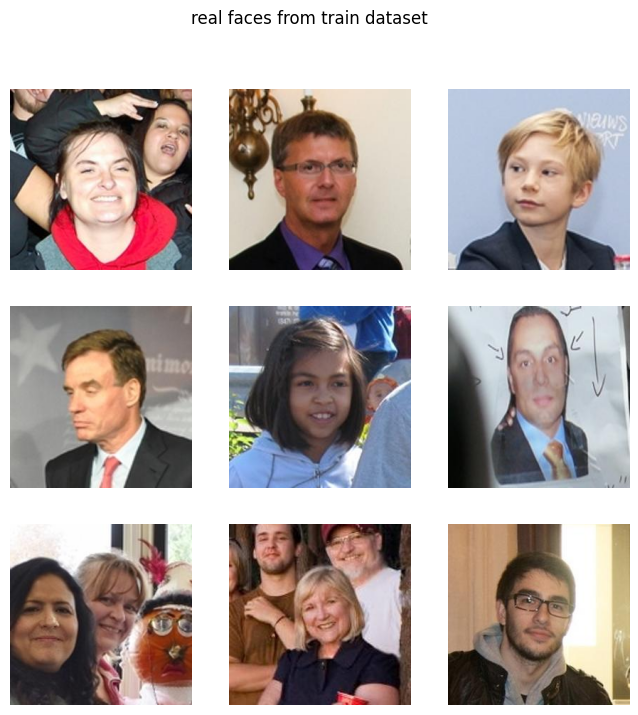

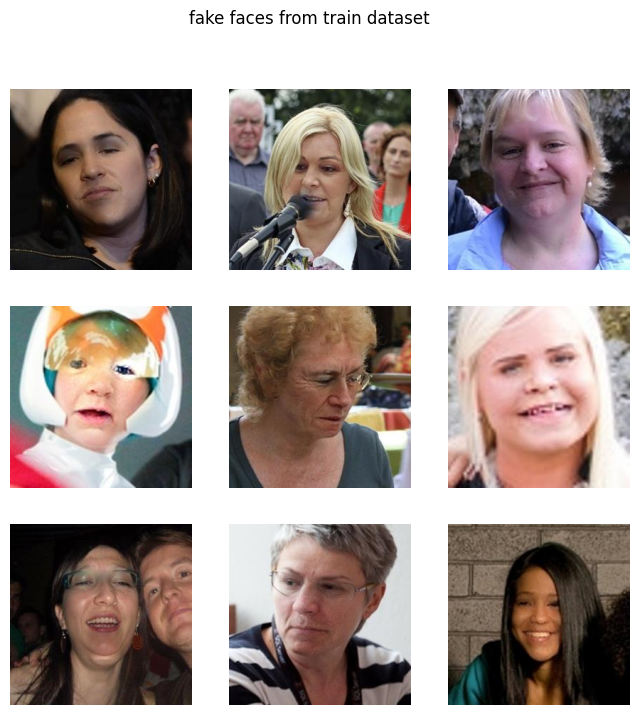

In [10]:
# Display real and fake images
plot_img(datapath, 'real').show()
plot_img(datapath, 'fake').show()

In [11]:
# Define input image shape
input_shape = (256,256,3)

In [14]:
# Define CNN model
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))  # Normalize input
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Flatten the feature maps and add a dense layer for binary classification
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

In [16]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 256, 256, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 512)      │             

 Total params: 6,304,621 (24.05 MB)

 Trainable params: 6,300,551 (24.03 MB)

 Non-trainable params: 4,070 (15.90 KB)

In [17]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-6) # edit
opt = Adam(learning_rate=0.0001, weight_decay=1e-6) # edit
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
# Define model checkpoint to save the best model
filepath = "saved-final-model.keras" # edit
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [19]:
# Define training steps
train_steps = 80000 // 64
valid_steps = 5000 // 64

In [21]:
# Train the model for 4 epochs
history = model.fit( # edit
    train_flow,
    epochs=50,
    callbacks=callbacks_list,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

Epoch 1/50


E0000 00:00:1740320449.716157     723 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1740320449.989293     723 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-02-23 14:20:50.002328: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_480/3171558134.py", line 2, in <module>

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_7480]

In [21]:
# Train the model for 2 more epochs
history = model.fit( # edit
    train_flow,
    epochs=20,
    callbacks=callbacks_list,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1740312370.464027     599 service.cc:148] XLA service 0x7f4d1400d230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740312370.464797     599 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-23 12:06:10.603457: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1740312371.151409     599 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1740312371.477677     599 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was c

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_425/1751364507.py", line 2, in <module>

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_7468]

In [109]:
# Save the final trained model
model.save("saved-final-model-256.keras") # edit

In [110]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [111]:
# Function to plot loss
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [112]:
# Function to plot accuracy
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

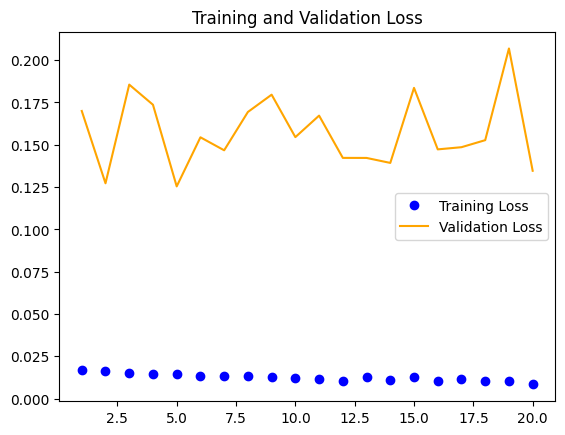

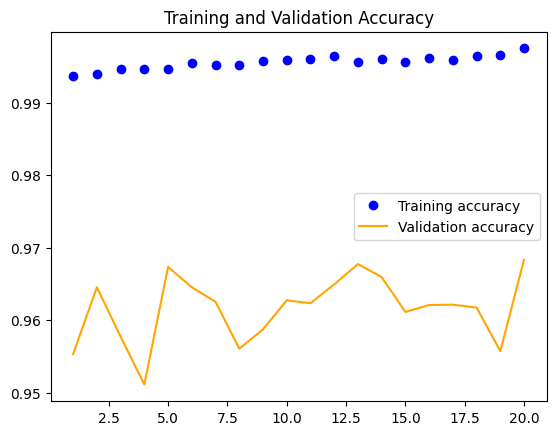

In [113]:
# Plot loss and accuracy
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [114]:
# Predict on test data
y_pred = model.predict(test_flow)
y_test = test_flow.classes

10905/10905 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step


In [115]:
from sklearn.metrics import confusion_matrix # edit
# Compute confusion matrix
results = confusion_matrix(y_test, y_pred > 0.5)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

Text(0.5, 23.52222222222222, 'Predicted label')

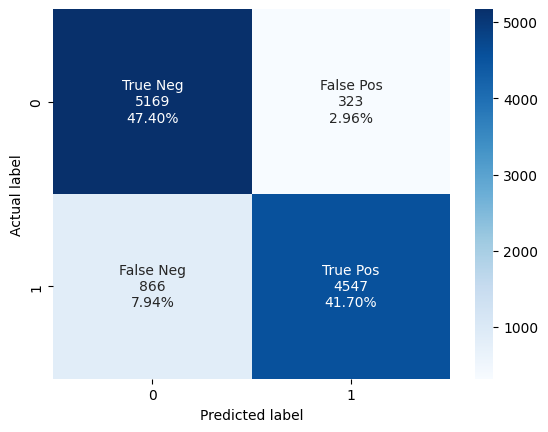

In [116]:
# Plot confusion matrix heatmap
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [117]:
from sklearn.metrics import accuracy_score # edit
from sklearn.metrics import classification_report # edit
import sklearn.metrics as metrics # edit
# Print evaluation metrics
print('Accuracy Score:', accuracy_score(y_test, y_pred > 0.5))
print('Report:')
print(classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))

Accuracy Score: 0.8909674461256304
Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5492
           1       0.93      0.84      0.88      5413

    accuracy                           0.89     10905
   macro avg       0.90      0.89      0.89     10905
weighted avg       0.89      0.89      0.89     10905

ROC-AUC Score: 0.9700724692477136


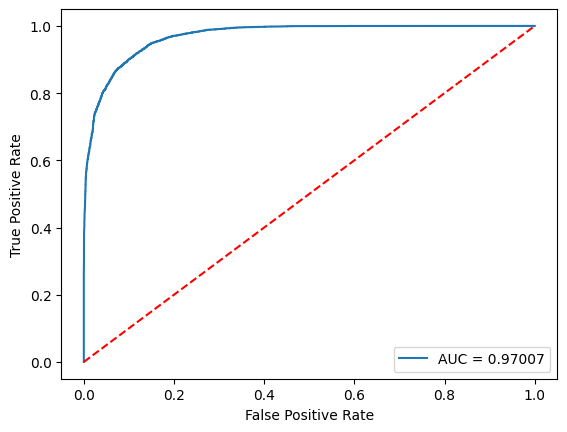

In [118]:
# Plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {metrics.auc(fpr, tpr):.5f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [119]:
print("Number of filenames:", len(test_flow.filenames))

Number of filenames: 10905


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, 'Predicted by the model as REAL, actually is REAL')

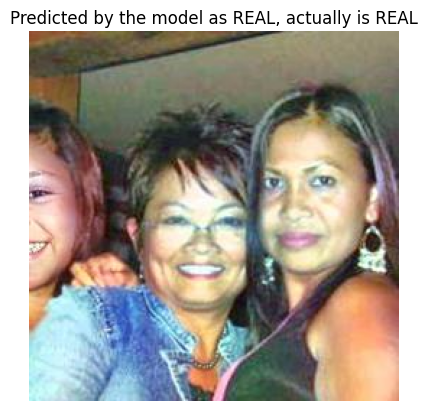

In [120]:
i = np.random.randint(len(test_flow.filenames))
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [30]:
def predict_img_class():
    # Adjust random index to stay within bounds of test_flow
    k = np.random.randint(len(test_flow))  # Use len(test_flow) instead of 20000
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx, gridy, figsize=(14, 14))

    for j in range(gridx):
        for i in range(gridy):
            # Get actual class (FAKE or REAL)
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
                
            # Get prediction from model
            if model.predict(test_flow[k][0])[0][0] < 0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
                
            # Load image
            datasetpath = test_flow.filenames[k]
            imgpath = datapath + 'test/' + datasetpath
            img = load_img(imgpath)          
            
            # Display image with prediction and actual label
            ax[j, i].imshow(img)
            ax[j, i].set_title(f"Predicted: {prediction}, Actual: {actual}", size=12)
            ax[j, i].axis('off')

            # Update k for the next image, staying within bounds
            k = np.random.randint(len(test_flow))  # Make sure it's within range of test_flow

    fig.suptitle('Testing the prediction on Test images', size=20)
    return plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<module 'matplotlib.pyplot' from '/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/matplotlib/pyplot.py'>

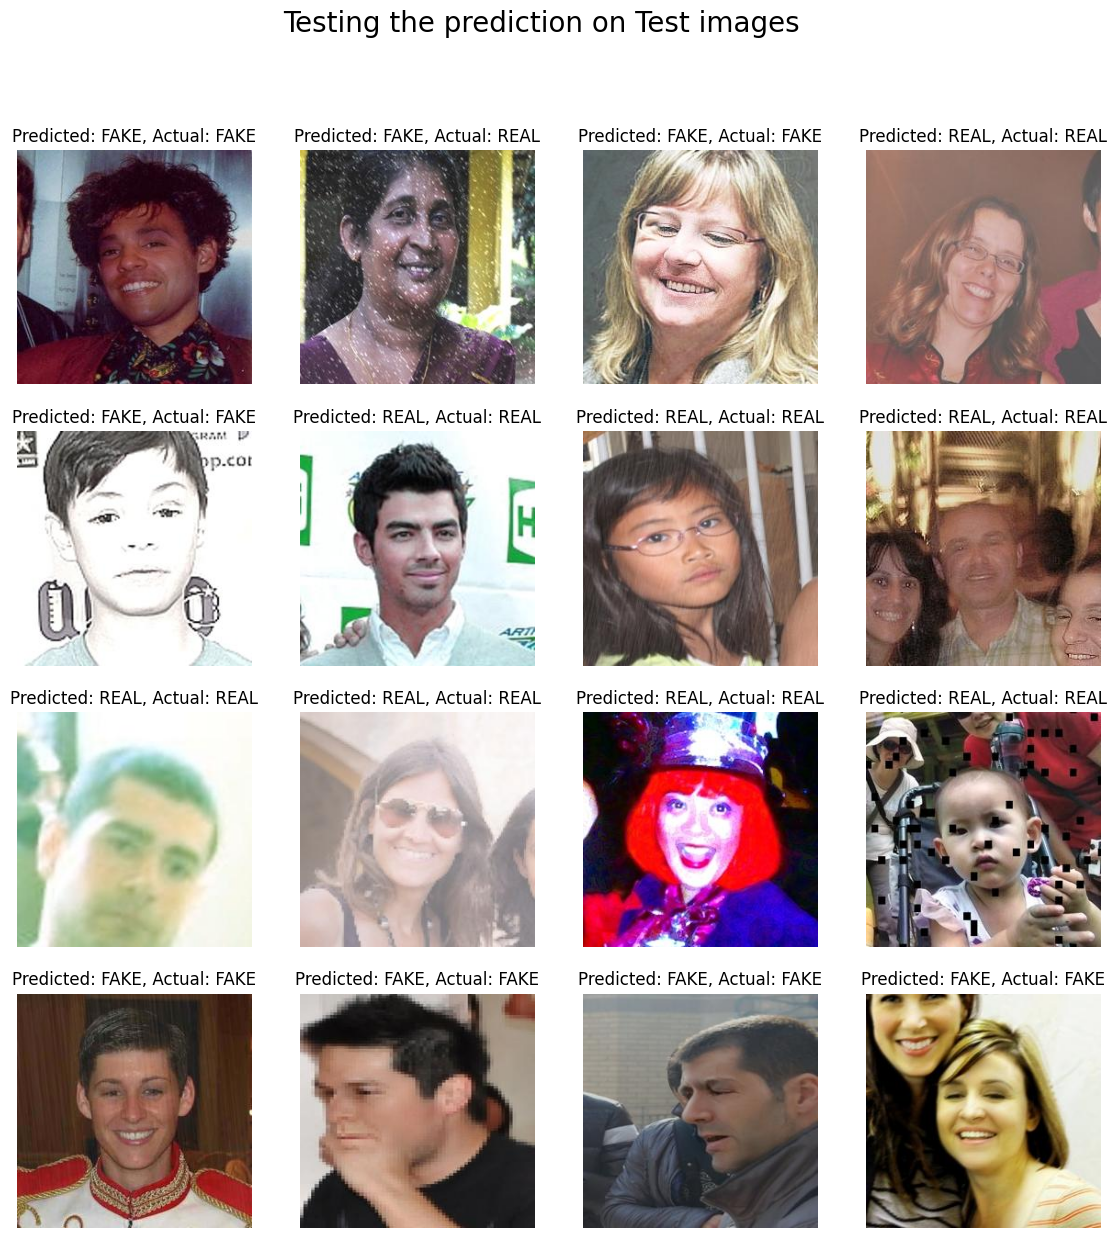

In [31]:
predict_img_class()

In [22]:
best_model = load_model("saved-final-model.keras")
final_model = load_model("saved-final-model-256.keras")

# Evaluate both
# best_model.evaluate(test_flow)
# final_model.evaluate(test_flow)

In [14]:
# best_model.summary()

In [38]:
########

In [1]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("saved-final-model.keras")

# Print model summary to verify it's loaded
# model.summary()


2025-02-23 14:46:17.747628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740321977.761862    2075 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740321977.766332    2075 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 14:46:17.780915: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1740321979.745235    2075 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 97

In [2]:
from tensorflow.keras.optimizers import AdamW

opt = AdamW(learning_rate=0.0001, weight_decay=1e-6)  # ✅ Correct


In [3]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [5]:
# Define callbacks
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model only
    monitor="val_accuracy",  # Track validation accuracy
    mode="max",  # Higher accuracy = better
    save_best_only=True,  # Only save if it improves
    verbose=1
)
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=3,  # Stop if no improvement for 3 epochs
    mode="max",
    restore_best_weights=True
)

In [6]:
print(model.input_shape)  # Check expected input shape

(None, 256, 256, 3)


In [7]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution


In [18]:
# Resume training for more epochs
history = model.fit(
    train_flow,  # Your training dataset
    validation_data=valid_flow,  # Your validation dataset
    epochs=10,  # Train for 10 more epochs
    callbacks=[checkpoint, early_stopping]
)

print("🎉 Training complete. Best model saved as best_model.keras.")

/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/home/blaise/anaconda3/envs/py310/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
I0000 00:00:1740322038.022976    2075 cuda_dnn.cc:529] Loaded cuDNN version 90701


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9964 - loss: 0.0105
Epoch 1: val_accuracy improved from -inf to 0.96538, saving model to best_model.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5396s 2s/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9654 - val_loss: 0.1431
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9974 - loss: 0.0079
Epoch 2: val_accuracy did not improve from 0.96538
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 1299s 593ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9624 - val_loss: 0.1649
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.9975 - loss: 0.0076
Epoch 3: val_accuracy did not improve from 0.96538
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 915s 418ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9642 - val_loss: 0.1619
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9974 - loss: 0.0077
Epoch 4: val_accuracy did not improve from 0.96538
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 927s 423ms/step 

In [19]:
#####

In [21]:
best_model = load_model("best_model.keras")

# Evaluate
best_model.evaluate(test_flow)

10905/10905 ━━━━━━━━━━━━━━━━━━━━ 410s 38ms/step - accuracy: 0.9395 - loss: 0.2555


[0.48837000131607056, 0.8881247043609619]

In [23]:
# Predict on test data
y_pred = model.predict(test_flow)
y_test = test_flow.classes

10905/10905 ━━━━━━━━━━━━━━━━━━━━ 285s 26ms/step


In [24]:
from sklearn.metrics import confusion_matrix # edit
# Compute confusion matrix
results = confusion_matrix(y_test, y_pred > 0.5)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

Text(0.5, 23.52222222222222, 'Predicted label')

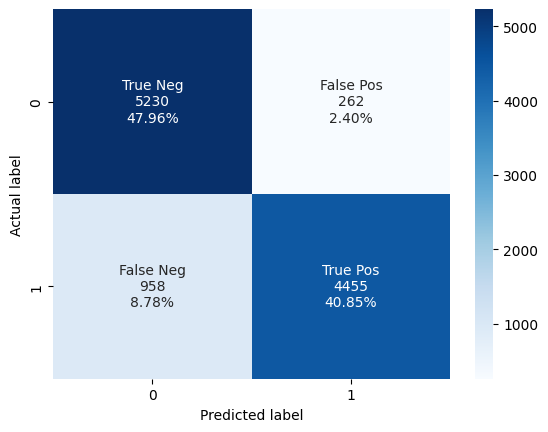

In [25]:
# Plot confusion matrix heatmap
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
from sklearn.metrics import accuracy_score # edit
from sklearn.metrics import classification_report # edit
import sklearn.metrics as metrics # edit
# Print evaluation metrics
print('Accuracy Score:', accuracy_score(y_test, y_pred > 0.5))
print('Report:')
print(classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))

Accuracy Score: 0.8881247134342045
Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5492
           1       0.94      0.82      0.88      5413

    accuracy                           0.89     10905
   macro avg       0.89      0.89      0.89     10905
weighted avg       0.89      0.89      0.89     10905

ROC-AUC Score: 0.9712582626944467


In [29]:
from sklearn.metrics import classification_report
import numpy as np

# Load the best saved model
best_model = load_model("best_model.keras")

# Get the true labels from the test set
y_true = test_flow.classes  # True labels

# Generate predictions from the model
y_pred_probs_best = best_model.predict(test_flow)  # Get probabilities
y_pred_best = (y_pred_probs_best > 0.5).astype(int).flatten()  # Convert to class labels

# Get class labels from the data generator
class_labels = list(test_flow.class_indices.keys())  # Extract class names

# Generate and print classification report
report_best = classification_report(y_true, y_pred_best, target_names=class_labels)
print(report_best)


10905/10905 ━━━━━━━━━━━━━━━━━━━━ 281s 26ms/step
              precision    recall  f1-score   support

        Fake       0.85      0.95      0.90      5492
        Real       0.94      0.82      0.88      5413

    accuracy                           0.89     10905
   macro avg       0.89      0.89      0.89     10905
weighted avg       0.89      0.89      0.89     10905



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
best_model = tf.keras.models.load_model("best_model.keras")

# Path to the new image from another dataset
# img_path = "real-vs-fake/train/real/00002.jpg"  
img_path = "Dataset/test/Real/fake_204.jpg"  

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Normalize (assuming your model was trained with normalization)
img_array = np.expand_dims(img_array, axis=0)  # Expand to (1, 256, 256, 3) for batch input

# Make prediction
prediction = best_model.predict(img_array)

# Get class labels
class_labels = list(test_flow.class_indices.keys())  # Extract class names

# Get predicted class
predicted_class = class_labels[int(prediction[0] > 0.5)]  # 0 or 1

# Display the result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"Model Prediction: {predicted_class}")
